In [1]:
import pandas as pd
import math
import os
import conda
import matplotlib.pyplot as plt
conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

In [2]:
df = pd.read_csv('./house_sale_data_with_geocodes.csv')

In [3]:
df = df.dropna()

In [4]:
df['sell_date'] = pd.to_datetime(df['sell_date'],format='%d-%m-%Y')

In [5]:
df.head()

,address,zip_code,price,sell_date,sell_type,price_per_sq_m,no_rooms,housing_type,size_in_sq_m,year_of_construction,price_change_in_pct,zip_code_num,long,lat
0,Nykøbingvej 23,4460 Snertinge,150000,2017-04-05,Alm. Salg,1209.0,4.0,Villa,124.0,1934.0,0.0,4460,11.383189,55.714074
1,Bakkekammen 5,4460 Snertinge,1145000,2017-03-24,Alm. Salg,9015.0,3.0,Villa,127.0,1971.0,-4.0,4460,11.381936,55.717096
2,Æblekjærvej 11,4460 Snertinge,700000,2017-02-15,Alm. Salg,6666.0,3.0,Villa,105.0,1946.0,-12.0,4460,11.381427,55.719840
3,Bakkekammen 7,4460 Snertinge,920000,2017-01-30,Alm. Salg,8518.0,4.0,Villa,108.0,1966.0,-3.0,4460,11.382017,55.716914
4,Tværvej 4,4460 Snertinge,300000,2016-12-01,Alm. Salg,3061.0,3.0,Villa,98.0,1964.0,0.0,4460,11.381899,55.710771


### Create a plot with the help of Basemap, on which you plot sales records for 2015 which are not farther away than 50km from Copenhagen city center (lat: 55.676111, lon: 12.568333)

In [6]:
def haversine_distance(origin, destination):

    lat_orig, lon_orig = origin
    lat_dest, lon_dest = destination
    radius = 6371

    dlat = math.radians(lat_dest-lat_orig)
    dlon = math.radians(lon_dest-lon_orig)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(lat_orig)) 
        * math.cos(math.radians(lat_dest)) * math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [7]:
mask_2015 = (df['sell_date'].dt.year == 2015 ) 

In [8]:
df_2015 = df[mask_2015]

In [9]:
df.head()

,address,zip_code,price,sell_date,sell_type,price_per_sq_m,no_rooms,housing_type,size_in_sq_m,year_of_construction,price_change_in_pct,zip_code_num,long,lat
0,Nykøbingvej 23,4460 Snertinge,150000,2017-04-05,Alm. Salg,1209.0,4.0,Villa,124.0,1934.0,0.0,4460,11.383189,55.714074
1,Bakkekammen 5,4460 Snertinge,1145000,2017-03-24,Alm. Salg,9015.0,3.0,Villa,127.0,1971.0,-4.0,4460,11.381936,55.717096
2,Æblekjærvej 11,4460 Snertinge,700000,2017-02-15,Alm. Salg,6666.0,3.0,Villa,105.0,1946.0,-12.0,4460,11.381427,55.719840
3,Bakkekammen 7,4460 Snertinge,920000,2017-01-30,Alm. Salg,8518.0,4.0,Villa,108.0,1966.0,-3.0,4460,11.382017,55.716914
4,Tværvej 4,4460 Snertinge,300000,2016-12-01,Alm. Salg,3061.0,3.0,Villa,98.0,1964.0,0.0,4460,11.381899,55.710771


In [10]:
df_2015['dist_2_cph'] = df_2015.apply(lambda row : haversine_distance((row['lat'],row['long']),(55.676111, 12.568333)), axis=1)


/Users/pravien/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
df_2015.head()

,address,zip_code,price,sell_date,sell_type,price_per_sq_m,no_rooms,housing_type,size_in_sq_m,year_of_construction,price_change_in_pct,zip_code_num,long,lat,dist_2_cph
22,Skippingevej 3,4460 Snertinge,225300,2015-12-16,Auktion,1341.0,6.0,Villa,168.0,1923.0,0.0,4460,11.382525,55.718039,74.454951
23,Apotekervej 4,4460 Snertinge,455000,2015-11-17,Alm. Salg,3473.0,4.0,Villa,131.0,1963.0,-8.0,4460,11.382423,55.709880,74.417785
24,Gartnerstien 9,4460 Snertinge,475000,2015-11-16,Auktion,5864.0,3.0,Rækkehus,81.0,1987.0,-17.0,4460,11.381309,55.709667,74.486523
25,Kalundborgvej 16,4460 Snertinge,600000,2015-10-18,Alm. Salg,7058.0,3.0,Villa,85.0,1929.0,-8.0,4460,11.385573,55.712387,74.232877
26,Vesterbjergvej 10,4460 Snertinge,590000,2015-09-06,Alm. Salg,6145.0,4.0,Rækkehus,96.0,2000.0,-21.0,4460,11.379996,55.711954,74.579687


In [16]:
mask_dist_smaller_50 = (df_2015.dist_2_cph <= 50)  

In [17]:
distances = df_2015[mask_dist_smaller_50]

In [18]:
distances.head()

,address,zip_code,price,sell_date,sell_type,price_per_sq_m,no_rooms,housing_type,size_in_sq_m,year_of_construction,price_change_in_pct,zip_code_num,long,lat,dist_2_cph
10284,Ellesøpark 41,2950 Vedbæk,5295000,2015-12-17,Alm. Salg,38933.0,6.0,Villa,136.0,1954.0,0.0,2950,12.556558,55.860441,20.509790
10285,Immortellevej 13A,2950 Vedbæk,32000000,2015-12-15,Alm. Salg,86253.0,8.0,Villa,371.0,1975.0,-20.0,2950,12.559430,55.865680,21.086465
10286,Trørødvej 41B,2950 Vedbæk,5875000,2015-12-09,Alm. Salg,29822.0,7.0,Villa,197.0,1966.0,-2.0,2950,12.549134,55.841800,18.462894
10287,Melchiorsvej 10,2950 Vedbæk,7350000,2015-12-02,Alm. Salg,44817.0,5.0,Rækkehus,164.0,2016.0,0.0,2950,12.553893,55.856832,20.115550
10288,Kong Georgsvej 18,2950 Vedbæk,4800000,2015-12-01,Alm. Salg,29447.0,4.0,Villa,163.0,1977.0,-4.0,2950,12.550219,55.864131,20.937548


<IPython.core.display.Javascript object>


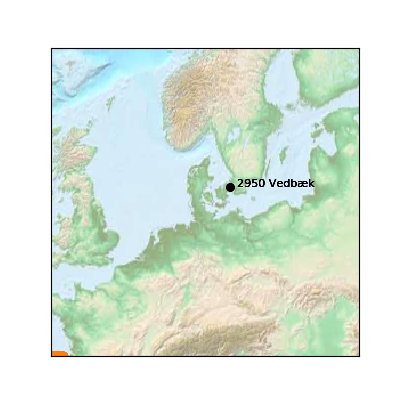

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [19]:
import warnings
warnings.filterwarnings('ignore')
from mpl_toolkits.basemap import Basemap
%matplotlib notebook
fig = plt.figure(figsize=(4, 4))
m = Basemap(projection='lcc', resolution=None,
            width=2000000, height=2000000, 
            lat_0=55, lon_0=10,)
m.etopo(scale=1.0, alpha=0.5)
i = 0
for add,z_code,lat,long in zip(distances['address'],distances['zip_code'],distances['lat'],distances['long']):
    x, y = m(long,lat)
    plt.plot(x, y, 'ok', markersize=5)
    plt.text(x + 50000, y - 0,z_code, fontsize=8)  
    if i == 3:
        break
    i+=1    

### Use folium to plot the locations of the 1992 housing sales for the city centers of Copenhagen (zip code 1000-1499), Odense (zip code 5000), Aarhus (zip code 8000), and Aalborg (zip code 9000), see Assignment 2 onto a map.

In [20]:
import folium
from IPython.display import IFrame

In [21]:
mask_1992 = ((df.sell_date.dt.year == 1992)&
             ((df.zip_code_num == 5000)|
              (df.zip_code_num == 8000)|
              (df.zip_code_num == 9000)
             )
) 

In [22]:
df_1992 = df[mask_1992]
df_1992.head()

,address,zip_code,price,sell_date,sell_type,price_per_sq_m,no_rooms,housing_type,size_in_sq_m,year_of_construction,price_change_in_pct,zip_code_num,long,lat
595818,"Odensegade 33, 3",8000 Aarhus C,550000,1992-12-23,Alm. Salg,7971.0,3.0,Lejlighed,69.0,1901.0,0.0,8000,10.201535,56.145117
595819,"Skovvejen 44B, 2. TV",8000 Aarhus C,480000,1992-12-22,Alm. Salg,7868.0,2.0,Lejlighed,61.0,1936.0,0.0,8000,10.218809,56.167951
595820,"Falstersgade 41B, 1. TH",8000 Aarhus C,725700,1992-12-15,Alm. Salg,6657.0,4.0,Lejlighed,109.0,1968.0,0.0,8000,10.198709,56.163906
595821,"Sjællandsgade 83, 3. TV",8000 Aarhus C,361626,1992-12-13,Alm. Salg,8036.0,2.0,Lejlighed,45.0,1886.0,0.0,8000,10.205327,56.162894
595822,Kriegersvej 9,8000 Aarhus C,793000,1992-12-12,Alm. Salg,7080.0,5.0,Rækkehus,112.0,1880.0,0.0,8000,10.199540,56.149800


In [23]:
my_map = folium.Map(location=[55.88207495748612, 10.636574309440173], zoom_start=6)
for add,z_code,lat,long in zip(df_1992['address'],df_1992['zip_code'],df_1992['lat'],df_1992['long']):
    folium.CircleMarker(location=[lat, long], radius=2,popup=add+'\n '+z_code).add_to(my_map)
my_map.save('./large_flat_trades.html')   

In [24]:
IFrame(src='./large_flat_trades.html', width=700, height=600)

### Create a 2D plot, which compares prices per square meter (on the x-axis) and distance to Nørreport st. (y-axis) for all housing on Sjæland for the year 2005 and where the zip code is lower than 3000 and the price per square meter is lower than 80000Dkk. Describe in words what you can read out of the plot. Formulate a hypothesis on how the values on the two axis might be related.

In [27]:
mask_2005 = (
    (df.sell_date.dt.year == 2005)&
    (df.zip_code_num < 3000)&
    (df.price_per_sq_m < 80000)
)

In [29]:
df_2005 = df[mask_2005]

In [30]:
df_2005['dist_norre'] = df_2005.apply(lambda row : haversine_distance((row['lat'],row['long']),(55.683010, 12.571143)), axis=1)

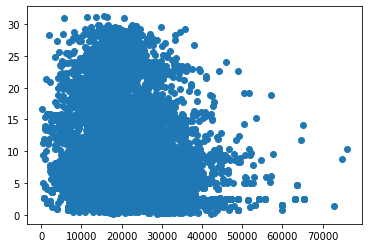

In [36]:
%matplotlib inline
plt.scatter(df_2005.price_per_sq_m,df_2005.dist_norre)

### Create a histogram (bar plot), which visualizes the frequency of house trades per zip code area corresponding to the entire dataset of housing sale records.

(array([ 38871., 229844., 133335., 123834., 129315., 101144., 130518.,
         96183., 182528., 116266.]),
 array([1050., 1944., 2838., 3732., 4626., 5520., 6414., 7308., 8202.,
        9096., 9990.]),
 <a list of 10 Patch objects>)

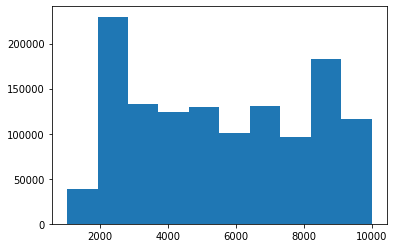

In [43]:
plt.hist(df.zip_code_num, bins=10)

### Create a cumulatve histogram, which visualizes the frequency of house trades per zip code area corresponding to the entire dataset of housing sale records and the vertical bars are colored to the frequency of rooms per sales record. That is, a plot similar to the following, where single rooms are in the bottom and two room frequencies on top, etc. See, http://matplotlib.org/1.3.0/examples/pylab\_examples/histogram\_demo\_extended.html for example.

### Now, you create a 3D histogram, in which you plot the frequency of house trades per zip code area as a 'layer' for every in the dataset, see http://matplotlib.org/examples/mplot3d/index.html for an example.

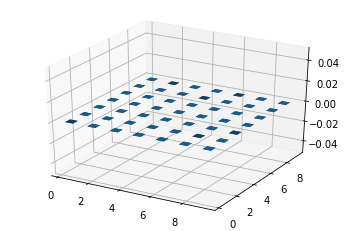

In [49]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
hist, xedges, yedges = np.histogram2d(df.zip_code_num,df.zip_code_num,bins=7, range=[[0, 10], [0, 10]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

### Freestyle Create a plot, which visualizes a fact hidden in the housing sales data, which you want to highlight to business people.